In [8]:
import numpy as np
import sys
from rnn_norm import RNN
import matplotlib.pyplot as plt
import json
import torch
import seaborn as sns

## Loading Trained Weights

In [2]:
with open('SIN_norm_16_nodes/weight_history.json') as f:
    weight_history = json.load(f)

In [3]:
weight_history.keys()

dict_keys(['trained weights', 'connectivity matrix', 'input weights', 'output weights'])

In [4]:
weight_matrix = np.array(weight_history['trained weights'])
connectivity_matrix = np.array(weight_history['connectivity matrix'])
input_weights = np.array(weight_history['input weights'])
output_weight_matrix = np.array(weight_history['output weights'])

## Defining Network

In [5]:
time_constant = 100 #ms
timestep = 10 #ms
time = 3000 #ms
num_inputs = 1
num_nodes = 16
init_activations = np.zeros((num_nodes, 1))

network = RNN(weight_matrix, connectivity_matrix, init_activations, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)

100%|██████████| 300/300 [00:00<00:00, 38961.21it/s]


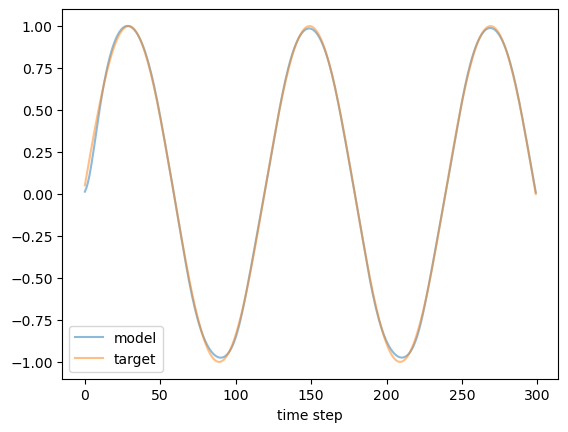

In [6]:
time_points = np.arange(300).reshape(-1,1)
# inputs = (1 + np.sin(time_points/10*np.pi))/2
# targets = (1 + np.sin((time_points+1)/10*np.pi))/2
inputs = np.sin(time_points/60*np.pi)
targets = np.sin((time_points+1)/60*np.pi)
inputs = inputs.reshape(-1,1)
targets = targets.reshape(-1,1)
outputs, activations = network.simulate(time, torch.tensor(inputs).float(), input_weights)
fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
# plt.plot(time_points, inputs)
plt.plot(time_points, targets, alpha=0.5, label='target')
plt.xlabel("time step")
plt.legend()
# plt.savefig("fig/SIN_norm_train.png")

100%|██████████| 300/300 [00:00<00:00, 21384.24it/s]


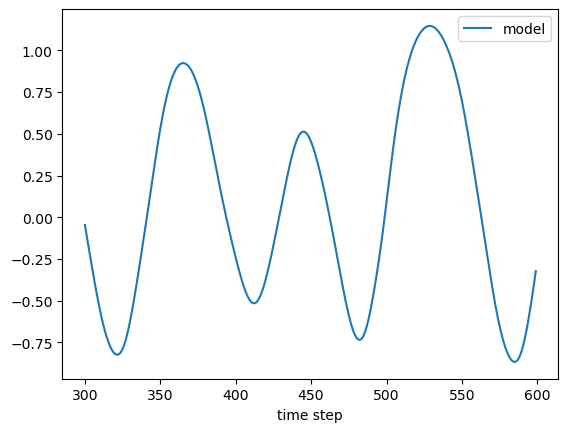

In [7]:
time_pred = 3000
time_points_pred = np.arange(300,600).reshape(-1,1)
inputs_pred = (1 + np.sin(time_points_pred/60*np.pi))/2
inputs = inputs.reshape(-1,1)

outputs_pred, activations_pred = network.simulate(time_pred, torch.tensor(inputs_pred).float(), input_weights)
fig, ax = plt.subplots()
plt.plot(time_points_pred, outputs_pred.detach().numpy(), label='model')
plt.xlabel("time step")
plt.legend()
# plt.savefig("fig/SIN_norm_pred.png")

Text(50.722222222222214, 0.5, 'Node')

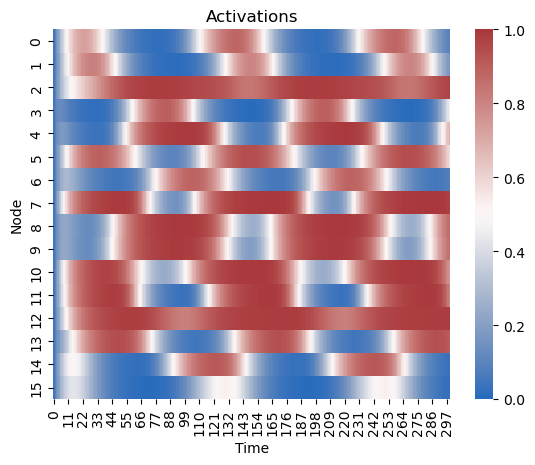

In [9]:
activations_t = activations.detach().numpy().T
sns.heatmap(activations_t, cmap='vlag', vmax=1, vmin=0)
plt.title('Activations')
plt.xlabel('Time')
plt.ylabel('Node')